In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# get the data
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

--2025-05-14 23:40:30--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘laptops.csv.1’

laptops.csv.1       100%[===================>] 291.58K  --.-KB/s    in 0.006s  

2025-05-14 23:40:30 (49.7 MB/s) - ‘laptops.csv.1’ saved [298573/298573]



In [3]:
# read the data
df = pd.read_csv("laptops.csv")

In [4]:
# preparing the dataset
#------------------------------------------------------------------------------
# normalize the column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [5]:
# select only specific columns
df = df[["ram", "storage", "screen", "final_price"]]

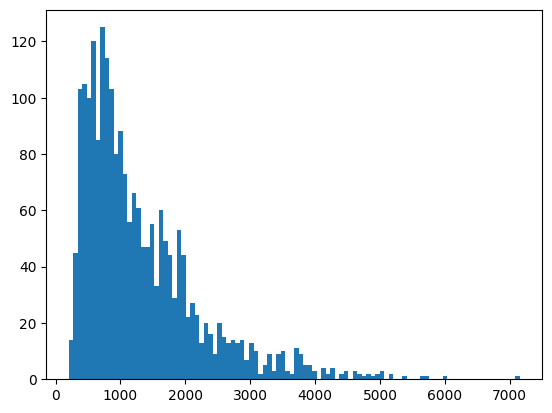

In [6]:
# eda
plt.hist(df.final_price, bins = 100)
plt.show()

yes the distribution has a long tail.

Q1. There's one column with missing values. What is it?

In [7]:
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

the column screen has missing values.

Q2. What's the median (50% percentile) for variable 'ram'?

In [8]:
median_ram = df.ram.median()

print(median_ram)

16.0


Prepare and split the dataset

In [12]:
# set the seed
np.random.seed(42)

# shuffle the dataset
idx = np.arange(len(df))
np.random.shuffle(idx)
df_shuffled = df.iloc[idx]

# define the size of train, val and test sets
n = len(df)
n_train = int(n * 0.6)
n_val = int(n * 0.2)

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val:].copy()

Question 3